# I. Import Data & Libraries

In [2]:
# Data manipulation
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Modeling
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error

from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Data Viz
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
# Change directory
import os
directory = 'F:\Rakamin VIX - Data Sciece Home Credit\home-credit-default-risk'
os.chdir(directory)

# Ignore warnings
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [4]:
# Import main table
train = pd.read_csv('application_train.csv')
test= pd.read_csv('application_test.csv')

# Import supplymentary table
pos = pd.read_csv('POS_CASH_balance.csv')
installment = pd.read_csv('installments_payments.csv')
credit = pd.read_csv('credit_card_balance.csv')
p_app = pd.read_csv('previous_application.csv')

In [5]:
# Have a look on the train data
print('Shape: ', train.shape)
train.head(5)

Shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Have a look on the test data
print('Shape: ', test.shape)
test.head(5)

Shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# II. Data Cleaning

In [7]:
train.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [8]:
# Create a dataframe of only categorical variables
cat_train = train.select_dtypes(['object'])
cat_test = test.select_dtypes(['object'])

# Create a dataframe of only numerical variables
num_train = train.select_dtypes(['int64', 'float64'])
num_test = test.select_dtypes(['int64', 'float64'])

In [9]:
#1. Numerical data

num_train.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
#2. Catgorical Data
# Skim the output to look for things to fix
cat_train.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN


In [11]:
# Number of unique classes in each object column
cat_train.apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [12]:
bi_cols = []

# Loop through each column and store all columns with only 2 values in the bi_cols list

for col in cat_train.columns:
    if len(list(cat_train[col].unique())) <= 2:
        bi_cols.append(col)

cat_train[bi_cols].head()

,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY
0,Cash loans,N,Y
1,Cash loans,N,N
2,Revolving loans,Y,Y
3,Cash loans,N,Y
4,Cash loans,N,Y


In [13]:
# Label Encoding for the test and train data
lb_make = LabelEncoder()
for col in bi_cols:
    cat_train[col] = lb_make.fit_transform(cat_train[col])
    cat_test[col] = lb_make.fit_transform(cat_test[col])

In [14]:
# Table after Label Encoding
cat_train[bi_cols].head()

,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY
0,0,0,1
1,0,0,0
2,1,1,1
3,0,0,1
4,0,0,1


# One Hot Encoding

In [15]:
cat_train.head()


,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,0,M,0,1,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,0,F,0,0,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,1,M,1,1,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,0,F,0,1,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,0,M,0,1,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN


In [16]:
# Using pd.get_dummies to do the OHE, this method does not need to impute the missing value
cat_train = pd.get_dummies(cat_train)
cat_test = pd.get_dummies(cat_test)
cat_train.head()


,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Combine the num_df and cat_df into one new DataFrame

encoded_train = pd.concat([num_train, cat_train], axis=1)
encoded_test = pd.concat([num_test, cat_test], axis=1)

# Outliers

In [18]:
# Days_employed
encoded_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [19]:
anom = encoded_train[encoded_train['DAYS_EMPLOYED'] == 365243]
non_anom = encoded_train[encoded_train['DAYS_EMPLOYED'] != 365243]
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))

The anomalies default on 5.40% of loans


In [20]:
# Create an anomalous flag column
encoded_train['DAYS_EMPLOYED_ANOM'] = encoded_train["DAYS_EMPLOYED"] == 365243
encoded_test['DAYS_EMPLOYED_ANOM'] = encoded_test["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
encoded_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
encoded_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# Supplemental Table
#Aggregation of numeric variables

In [21]:
def agg_numeric(df, group_var, df_name):

    # Remove id variables other than grouping variable
    for col in df:
        if col != group_var and 'SK_ID' in col:
            df = df.drop(columns = col)
            
    numeric_df = df.select_dtypes('number')
    numeric_df[group_var] = df[group_var]

    # Group by the specified variable and calculate the statistics
    agg = numeric_df.groupby(group_var).agg(['count', 'mean', 'sum']).reset_index()

    # Need to create new column names
    columns = [group_var]


    for var in agg.columns.levels[0]:
        if var != group_var:
            
            # [:-1] because the index column is ''
            for stat in agg.columns.levels[1][:-1]:
                columns.append('%s_%s_%s' % (df_name, var, stat))

    agg.columns = columns
    return agg

In [22]:
# We have four supplemental table and we need to combine them together and merge it with main table using SK_ID_CURR

# count_categorical function will do a OHE for categorical data and for each column, calculate sum and proportion of each value
def count_categorical(df, group_var, df_name):
    
    # get the categorical data and do OHE
    cat = pd.get_dummies(df.select_dtypes('object'))
    
    # add the id
    cat[group_var] = df[group_var]
    
    # aggregate by id
    cat = cat.groupby(group_var).agg(['sum', 'mean'])
    
    column_names = []
    
    # for each first level column name, we define a new column name
    for var in cat.columns.levels[0]:
        for stat in ['count', 'count_norm']:
            # Make a new column name
            column_names.append('%s_%s_%s' % (df_name, var, stat))
    
    cat.columns = column_names
    
    return cat

Aggregation for each supplemental table



In [23]:
# Pos
pos_counts = count_categorical(pos, group_var = 'SK_ID_CURR', df_name = 'os')
pos_agg = agg_numeric(pos, group_var = 'SK_ID_CURR', df_name = 'pos')

In [24]:
# Installment
installment_agg = agg_numeric(installment, group_var = 'SK_ID_CURR', df_name = 'installment')

In [25]:
# Credit
credit_counts = count_categorical(credit, group_var = 'SK_ID_CURR', df_name = 'credit')
credit_agg = agg_numeric(credit, group_var = 'SK_ID_CURR', df_name = 'credit')

In [26]:
# p_app
p_app_counts = count_categorical(p_app, group_var = 'SK_ID_CURR', df_name = 'p_app')
p_app_agg = agg_numeric(p_app, group_var = 'SK_ID_CURR', df_name = 'p_app')

Merge with train and test table

In [27]:
# Merge with the train
encoded_train = encoded_train.merge(pos_counts, on = 'SK_ID_CURR', how = 'left')
encoded_train = encoded_train.merge(pos_agg, on = 'SK_ID_CURR', how = 'left')

encoded_train = encoded_train.merge(installment_agg, on = 'SK_ID_CURR', how = 'left')

encoded_train = encoded_train.merge(credit_counts, on = 'SK_ID_CURR', how = 'left')
encoded_train = encoded_train.merge(credit_agg, on = 'SK_ID_CURR', how = 'left')

encoded_train = encoded_train.merge(p_app_counts, on = 'SK_ID_CURR', how = 'left')
encoded_train = encoded_train.merge(p_app_agg, on = 'SK_ID_CURR', how = 'left')

In [28]:
# Merge with the test
encoded_test = encoded_test.merge(pos_counts, on = 'SK_ID_CURR', how = 'left')
encoded_test = encoded_test.merge(pos_agg, on = 'SK_ID_CURR', how = 'left')

encoded_test = encoded_test.merge(installment_agg, on = 'SK_ID_CURR', how = 'left')

encoded_test = encoded_test.merge(credit_counts, on = 'SK_ID_CURR', how = 'left')
encoded_test = encoded_test.merge(credit_agg, on = 'SK_ID_CURR', how = 'left')

encoded_test = encoded_test.merge(p_app_counts, on = 'SK_ID_CURR', how = 'left')
encoded_test = encoded_test.merge(p_app_agg, on = 'SK_ID_CURR', how = 'left')

In [29]:
print('Training set full shape: ', encoded_train.shape)
print('Testing set full shape: ' , encoded_test.shape)

Training set full shape:  (307511, 712)
Testing set full shape:  (48744, 708)


In [30]:
copy_encoded_train = encoded_train.copy()
copy_encoded_test = encoded_test.copy()

III. Feature Selection


1. Missing Values

In [31]:
# Calculating proportion by summing NA values and dividing by length of DF
prop_na = encoded_train.isna().sum()/len(encoded_train)
# Filtering out columns with less than 5% NA values to clean up the visualization below
prop_na = prop_na[prop_na > 0.3]
prop_na = prop_na.sort_values(0, ascending=True).rename('missing_perc').reset_index()

In [32]:
prop_na.head()

,index,missing_perc
0,TOTALAREA_MODE,0.482685
1,YEARS_BEGINEXPLUATATION_MODE,0.487810
2,YEARS_BEGINEXPLUATATION_MEDI,0.487810
3,YEARS_BEGINEXPLUATATION_AVG,0.487810
4,FLOORSMAX_MEDI,0.497608


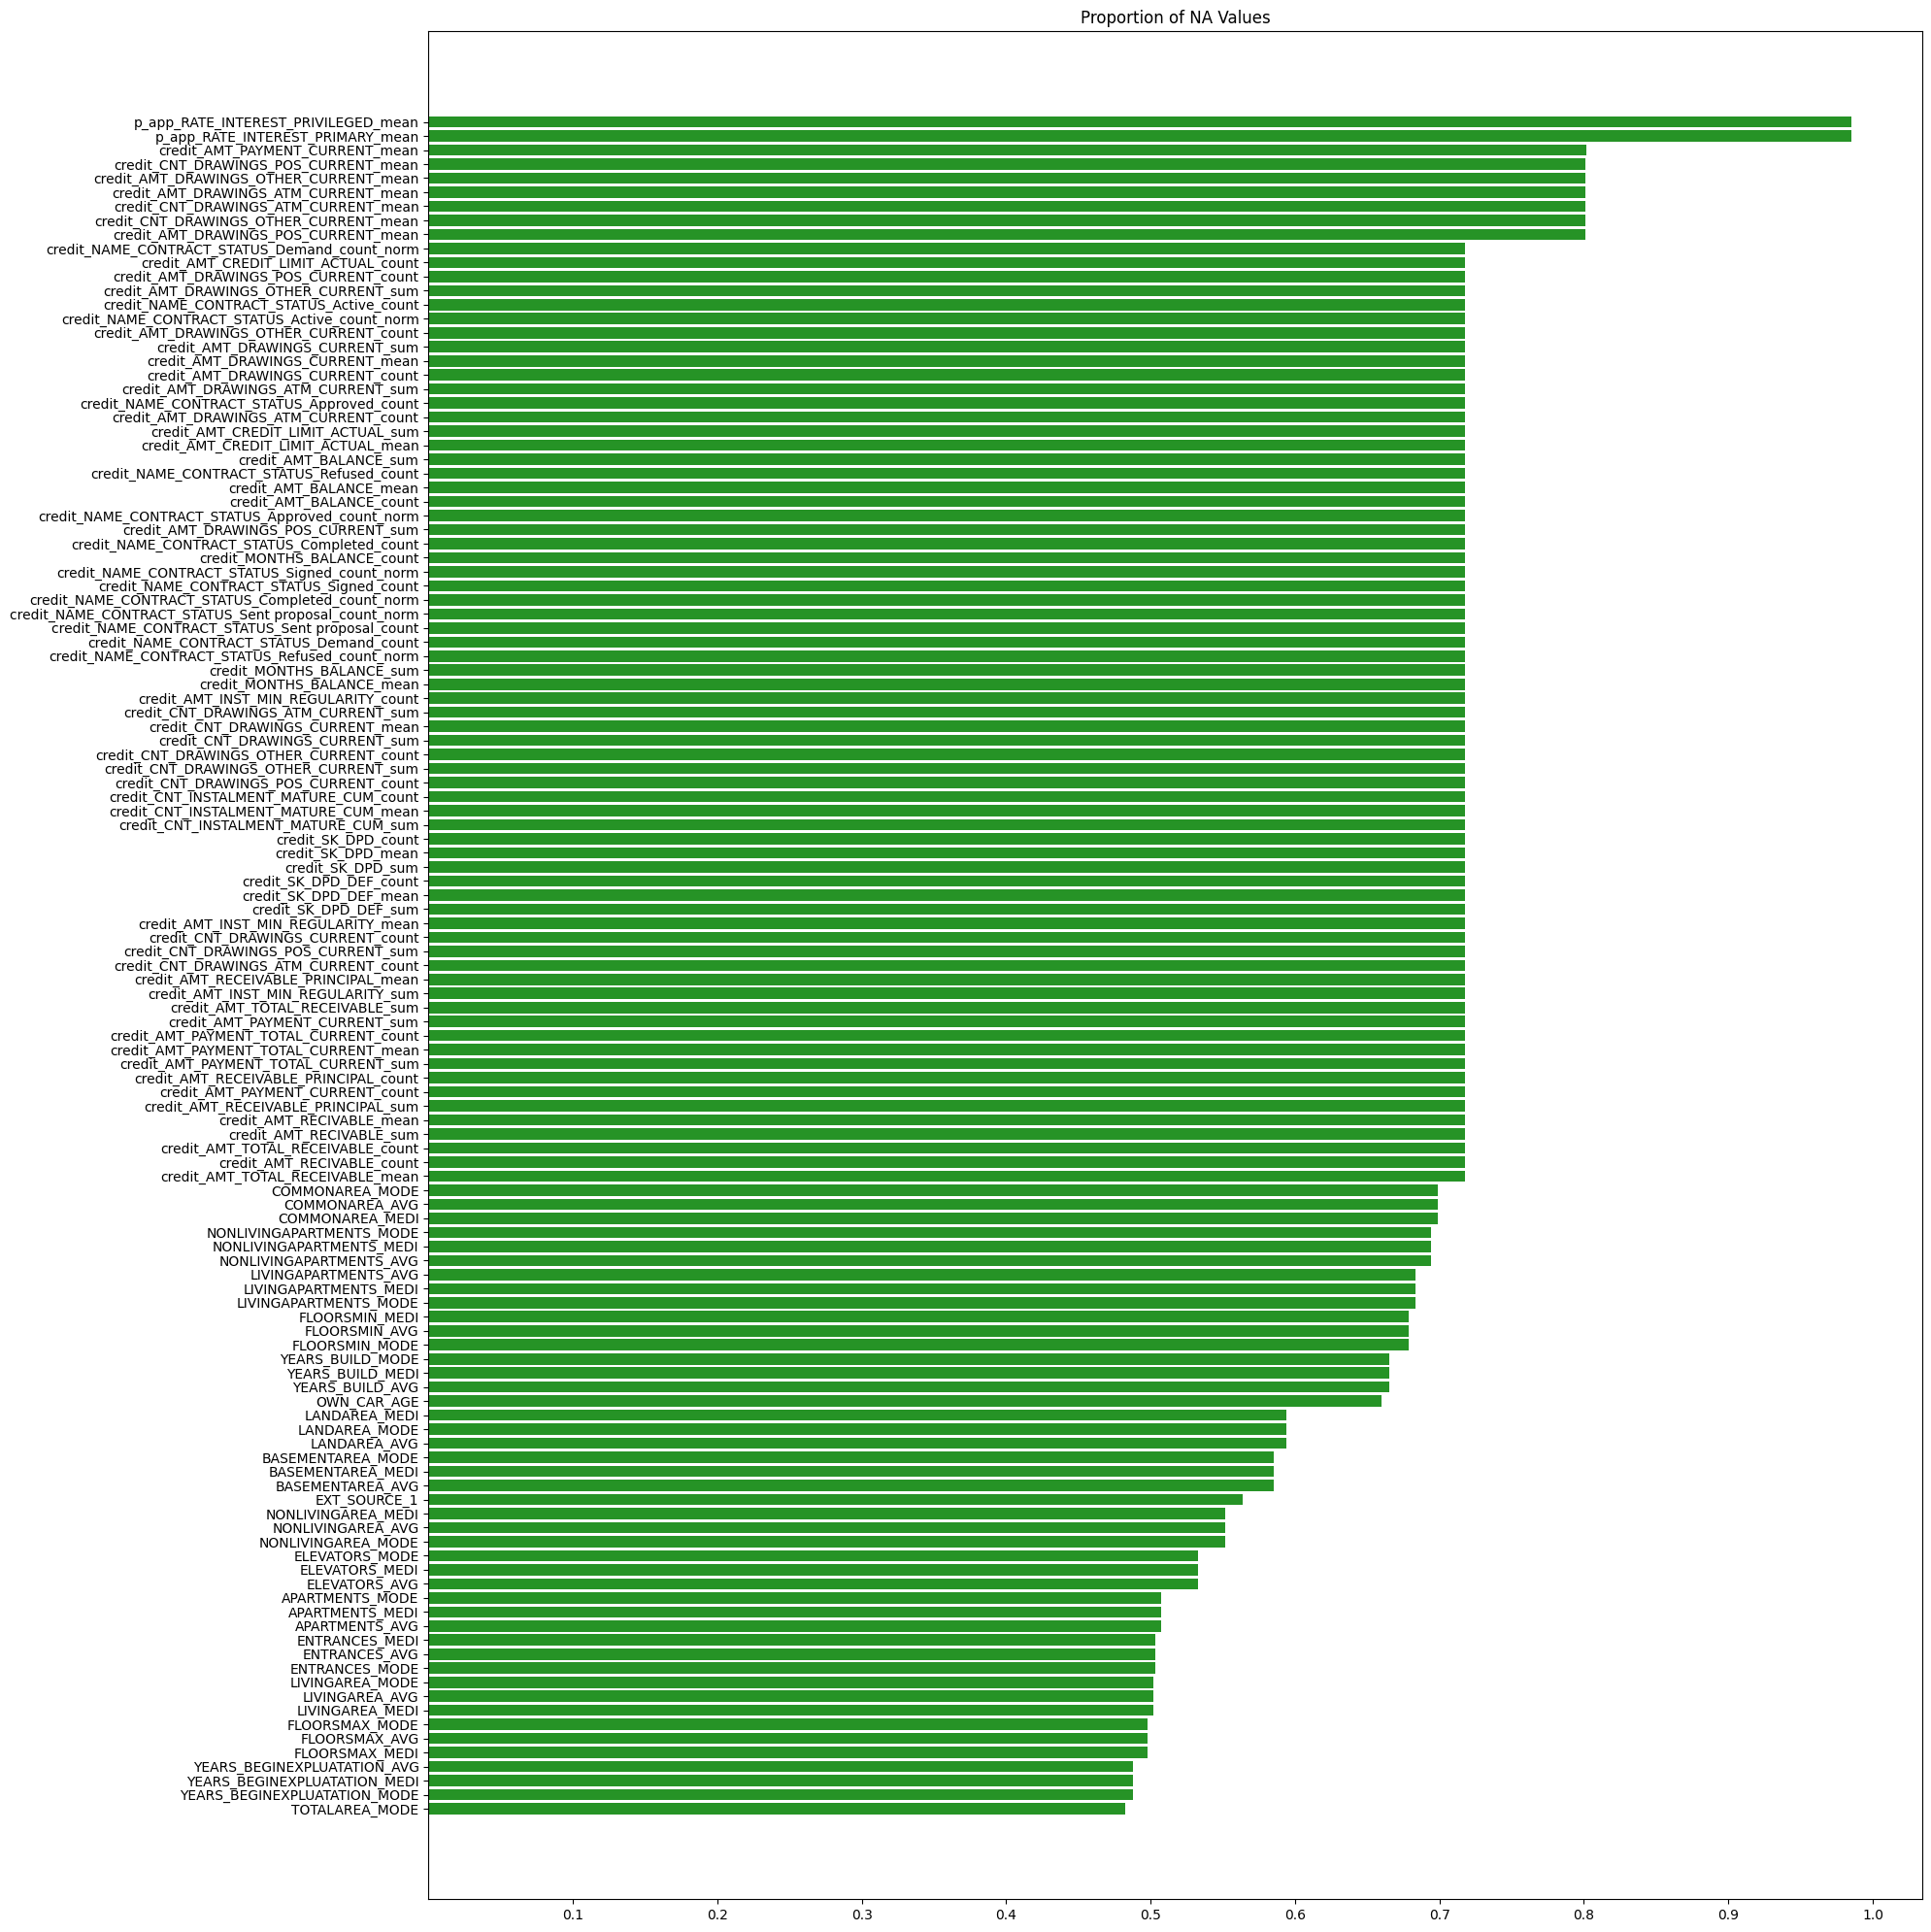

In [33]:
plt.figure(figsize=(20, 20))

barh = plt.barh(prop_na['index'], prop_na['missing_perc'], alpha=0.85, color='green')

plt.title('Proportion of NA Values')
plt.xticks(np.arange(.1, 1.01, .1))

plt.tight_layout()

In [34]:
def remove_missing(df_train, df_test, thredhold):
    
    # get the missing column and missing values percentage
    train_missing = (df_train.isnull().sum() / len(df_train)).sort_values(ascending = False)
    test_missing = (df_test.isnull().sum() / len(df_test)).sort_values(ascending = False)
    
    # filter the missing values by thredhold
    train_missing = train_missing.index[train_missing > thredhold]
    test_missing = test_missing.index[test_missing > thredhold]
    
    # combine the missing values columns from train and test
    all_missing = list(set(set(train_missing) | set(test_missing)))
    print('There are %d columns with more than %s%% missing values' % (len(all_missing), thredhold))
    
    # save the target column
    train_labels = train["TARGET"]
    
    # drop the missing values columns
    df_train = df_train.drop(columns = all_missing)
    df_test = df_test.drop(columns = all_missing)
    
    # align the columns from both table
    df_train, df_test = df_train.align(df_test, join = 'inner', axis = 1)
    df_train, df_test = df_train.align(df_test, join = 'inner', axis = 1)
    
    df_train["TARGET"] = train_labels
    
    print('Training set full shape: ', df_train.shape)
    print('Testing set full shape: ' , df_test.shape)
    
    return df_train, df_test

In [35]:
encoded_train, encoded_test = remove_missing(encoded_train, encoded_test, 0.60)


There are 92 columns with more than 0.6% missing values
Training set full shape:  (307511, 617)
Testing set full shape:  (48744, 616)


In [ ]:
# store and remove the id column

train_id = encoded_train['SK_ID_CURR']
test_id = encoded_test['SK_ID_CURR']

encoded_train = encoded_train.drop('SK_ID_CURR', axis=1)
encoded_test = encoded_test.drop('SK_ID_CURR', axis=1)

In [ ]:
# store and remove the train data target
target_train = encoded_train['TARGET']
encoded_train = encoded_train.drop('TARGET', axis=1)

In [ ]:
encoded_train.head()

In [ ]:
# format the column name
encoded_train.columns = [''.join (c if c.isalnum() else '_' for c in str(x)) for x in encoded_train.columns]
encoded_test.columns = [''.join (c if c.isalnum() else '_' for c in str(x)) for x in encoded_test.columns]

In [ ]:
# build a LightGBM model to select important features
d_train = lgb.Dataset(encoded_train, label=target_train)
param = {'max_depth': 5, 'learning_rate' : 0.1, 'num_leaves': 900, 'n_estimators': 100}
model = lgb.train(params=param,train_set=d_train)
ax = lgb.plot_importance(model, max_num_features=15)
plt.show()

In [ ]:
feature_important_thredhold = 5
feature_important = {model.feature_name()[i]:model.feature_importance()[i]  for i in range(len(model.feature_importance()))}
LGBM_features_columns = [d for d in feature_important if feature_important[d] > feature_important_thredhold]
print(f'There are {len(encoded_train[LGBM_features_columns].columns)} important features after LightGBM selection.')

In [ ]:
correlation_threshold = 0.8

# Calculating an absolute value correlation matrix
corr_mat = encoded_train[LGBM_features_columns].corr().abs()

# Getting upper triangle of this matrix only
upper = pd.DataFrame(np.triu(corr_mat, k=1), columns=encoded_train[LGBM_features_columns].columns)

# Select columns with correlations above threshold
corr_col_drop = [col for col in upper.columns if any(upper[col] > correlation_threshold)]

print(f'There are {len(corr_col_drop)} columns to remove out of {len(encoded_train[LGBM_features_columns].columns)}.')

In [ ]:
encoded_train_if = encoded_train[LGBM_features_columns].drop(corr_col_drop, axis=1)
encoded_test_if = encoded_test[LGBM_features_columns].drop(corr_col_drop, axis=1)

4. PCA
In this section, we will reduce the columns by a separate method, PCA.

In [ ]:
# define the number of components
n_comp=.95

# create a pca pipeline with median imputation
pipeline = Pipeline(steps = [('scaler', StandardScaler()),
                             ('imputer', SimpleImputer(strategy = 'median')),
                             ('pca', PCA(n_components=n_comp, svd_solver='full', random_state=1))])

pca = pipeline.named_steps['pca']

pipeline.fit(encoded_train)

train_pca = pipeline.transform(encoded_train)
test_pca = pipeline.transform(encoded_test)

plt.figure(figsize = (8, 5))
plt.plot(list(range(train_pca.shape[1])), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of PC'); plt.ylabel('Cumulative Variance Explained');
plt.title('Cumulative Variance Explained with PCA');

In [ ]:
# Select top n princple features
total_variance_explained = 0
print('Individual variance contributions:')

for j in range(12):
    print(pca.explained_variance_ratio_[j])
    total_variance_explained += pca.explained_variance_ratio_[j]
print('Explained variance: %.4f' % total_variance_explained)

In [ ]:
df_pca_train = pd.DataFrame(data=train_pca)
df_pca_test = pd.DataFrame(data=test_pca)

In [ ]:
# export cvs file
encoded_train_if['TARGET'] = target_train

encoded_train_if.to_csv('encoded_train_if.csv')
encoded_test_if.to_csv('encoded_test_if.csv')